In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_images = (pd.read_csv("/kaggle/input/digit-recognizer/test.csv").values).astype('float32')

In [5]:
train_images = (train.iloc[:, 1:].values).astype('float32')
train_labels = train['label'].values.astype('int32')

In [6]:
train_images.shape

(42000, 784)

In [7]:
train_labels.shape

(42000,)

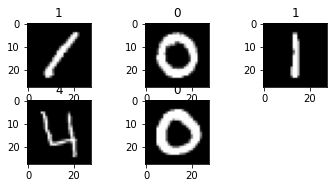

In [8]:
train_images = train_images.reshape(train_images.shape[0] ,28,28)

for i in range(0,5):
    plt.subplot(330+(i+1))
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i])

In [9]:
train_images = train_images.reshape(train_images.shape[0] ,28*28)

In [10]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
num_classes = train_labels.shape[1]
num_classes

10

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


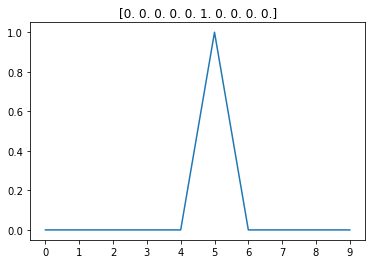

In [11]:
plt.title(train_labels[8])
plt.plot(train_labels[8])
plt.xticks(range(10));

In [12]:
seed = 43
np.random.seed(seed)

In [13]:
train_images.shape

(42000, 784)

In [14]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=(28*28)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
history=model.fit(train_images, train_labels, validation_split=0.05,
                 epochs=25, batch_size=64)

Epoch 1/25
624/624 [==============================] - 1s 2ms/step - loss: 2.6104 - accuracy: 0.6612 - val_loss: 0.7587 - val_accuracy: 0.7933
Epoch 2/25
624/624 [==============================] - 1s 1ms/step - loss: 0.5817 - accuracy: 0.8615 - val_loss: 0.5211 - val_accuracy: 0.8671
Epoch 3/25
624/624 [==============================] - 1s 1ms/step - loss: 0.4251 - accuracy: 0.9020 - val_loss: 0.4763 - val_accuracy: 0.8914
Epoch 4/25
624/624 [==============================] - 1s 1ms/step - loss: 0.3569 - accuracy: 0.9144 - val_loss: 0.4204 - val_accuracy: 0.9143
Epoch 5/25
624/624 [==============================] - 1s 1ms/step - loss: 0.3211 - accuracy: 0.9244 - val_loss: 0.3875 - val_accuracy: 0.9124
Epoch 6/25
624/624 [==============================] - 1s 1ms/step - loss: 0.2920 - accuracy: 0.9313 - val_loss: 0.3999 - val_accuracy: 0.9095
Epoch 7/25
624/624 [==============================] - 1s 1ms/step - loss: 0.2774 - accuracy: 0.9336 - val_loss: 0.4277 - val_accuracy: 0.9262
Epoch 

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

Text(0, 0.5, 'Loss')

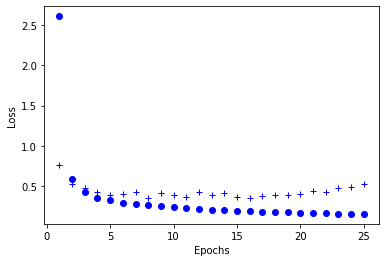

In [18]:
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [19]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

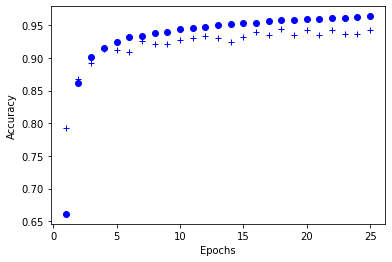

In [20]:
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [21]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=(28*28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=15, batch_size=64)

Epoch 1/15
657/657 [==============================] - 1s 2ms/step - loss: 8.1710 - accuracy: 0.3906
Epoch 2/15
657/657 [==============================] - 1s 2ms/step - loss: 1.3102 - accuracy: 0.6443
Epoch 3/15
657/657 [==============================] - 1s 2ms/step - loss: 0.8650 - accuracy: 0.7709
Epoch 4/15
657/657 [==============================] - 1s 2ms/step - loss: 0.6465 - accuracy: 0.8323
Epoch 5/15
657/657 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.8614
Epoch 6/15
657/657 [==============================] - 1s 2ms/step - loss: 0.4606 - accuracy: 0.8830
Epoch 7/15
657/657 [==============================] - 1s 2ms/step - loss: 0.4156 - accuracy: 0.8925
Epoch 8/15
657/657 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.9050
Epoch 9/15
657/657 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.9132
Epoch 10/15
657/657 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.9200

In [22]:
predictions = model.predict_classes(test_images, verbose=0)
submissions=pd.DataFrame({'ImageId':list(range(1,len(predictions) + 1)), "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)